<a href="https://colab.research.google.com/github/amrit-lal-singh/ML-Dl/blob/main/NN-MNIST-Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [12]:
X_cv , X_tr = X_train[:5000]/255.0 , X_train[5000:]/255.0

In [10]:
Y_cv, Y_tr = Y_train[:5000],Y_train[5000:]

In [11]:
class_names = [
 "T-shirt/top",
 "Trouser",
 "Pullover",
 "Dress",
 "Coat",
 "Sandal",
 "Shirt",
 "Sneaker",
 "Bag",
 "Ankle boot"
]

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))




In [21]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 400)               314000    
                                                                 
 dense_7 (Dense)             (None, 100)               40100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________


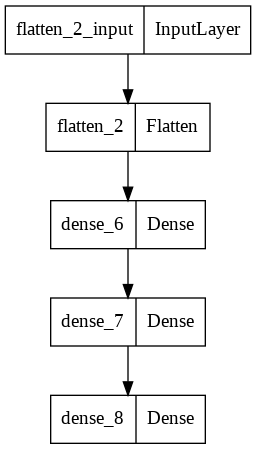

In [23]:
keras.utils.plot_model(model)

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [29]:
history = model.fit(X_tr, Y_tr, epochs=30,validation_data=(X_cv, Y_cv))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7066 - accuracy: 0.7708 - val_loss: 0.5177 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4838 - accuracy: 0.8306 - val_loss: 0.4740 - val_accuracy: 0.8414
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4402 - accuracy: 0.8456 - val_loss: 0.4204 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4135 - accuracy: 0.8555 - val_loss: 0.4128 - val_accuracy: 0.8570
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3935 - accuracy: 0.8617 - val_loss: 0.3975 - val_accuracy: 0.8642
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3770 - accuracy: 0.8680 - val_loss: 0.3693 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3634 - accuracy: 0.8722 - val_loss: 0.3688 - val_accuracy:

In [30]:
print(history.history)

{'loss': [0.7065629363059998, 0.4838334619998932, 0.440189003944397, 0.41353702545166016, 0.3934561014175415, 0.3769836723804474, 0.36341845989227295, 0.3517364263534546, 0.3401225209236145, 0.33154645562171936, 0.32225239276885986, 0.3146149516105652, 0.3077556788921356, 0.2988637685775757, 0.2937096655368805, 0.2877679169178009, 0.2805793881416321, 0.27566319704055786, 0.2694450318813324, 0.2652098834514618, 0.25929054617881775, 0.25476622581481934, 0.2500903904438019, 0.2447998821735382, 0.2416096031665802, 0.2364392727613449, 0.2320360392332077, 0.2283465564250946, 0.2246311604976654, 0.22048209607601166], 'accuracy': [0.7707818150520325, 0.8305636644363403, 0.8455636501312256, 0.8554909229278564, 0.8617091178894043, 0.8679636120796204, 0.8721818327903748, 0.8753272891044617, 0.8791818022727966, 0.8809636235237122, 0.8854727149009705, 0.8882908821105957, 0.8903999924659729, 0.893854558467865, 0.8940363526344299, 0.8960727453231812, 0.8995272517204285, 0.900563657283783, 0.902781844

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt


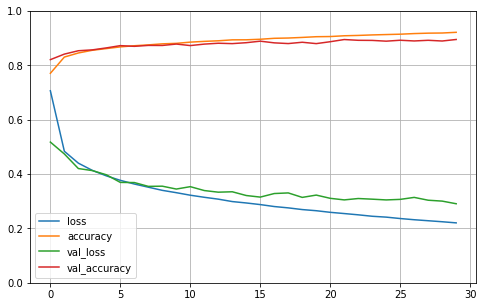

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()